In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather = requests.get(query_url + city)
weather_json = weather.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": 57.76,
        "lat": -20.21
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 70.14,
        "feels_like": 72.79,
        "temp_min": 68,
        "temp_max": 72,
        "pressure": 1015,
        "humidity": 88
    },
    "visibility": 10000,
    "wind": {
        "speed": 5.82,
        "deg": 320
    },
    "clouds": {
        "all": 20
    },
    "dt": 1584752926,
    "sys": {
        "type": 1,
        "id": 2061,
        "country": "MU",
        "sunrise": 1584756782,
        "sunset": 1584800344
    },
    "timezone": 14400,
    "id": 1106643,
    "name": "Quatre Cocos",
    "cod": 200
}


In [13]:
print(requests.get(query_url + city))

<Response [200]>


In [14]:
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

processing_rec = 1

print(f"The Beginning of data retrival started")
print(f"--------------------------------------")

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        processing_record += 1
        
    except:
        print("For city not found. Please skip...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"The Data Retrieval Complete")
print(f"-------------------------------")

y not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please skip...
For city not found. Please 

In [15]:
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               554
Country            554
Date               554
Latitude           554
Longitude          554
Max Temperature    554
Humidity           554
Cloudiness         554
Wind Speed         554
dtype: int64

In [16]:
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Mabaruma,GY,1584753399,8.20,-59.78,71.87,93,5,2.35
1,Ushuaia,AR,1584753399,-54.80,-68.30,39.20,90,40,26.40
2,Hilo,US,1584753232,19.73,-155.09,78.80,65,90,17.22
3,Bandarbeyla,SO,1584753400,9.49,50.81,81.41,84,0,7.09
4,Mataura,NZ,1584753400,-46.19,168.86,53.01,83,100,5.99


In [19]:
weather_data.to_csv("output_data/weather_cities")

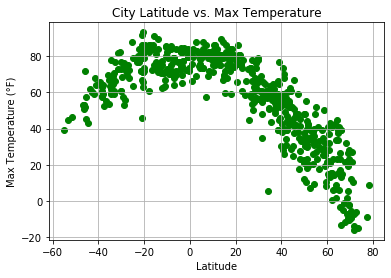

In [24]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="green", marker="o", edgecolors="green")
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/city_vs_max")
plt.show()

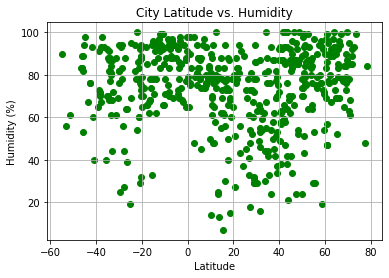

In [28]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="green", marker="o", edgecolor="green")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Humidity.png")

plt.show()

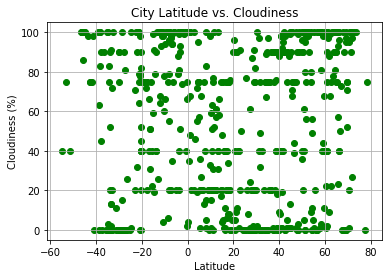

In [29]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="green", marker="o", edgecolor="green")
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Cloudiness.png")
plt.show()

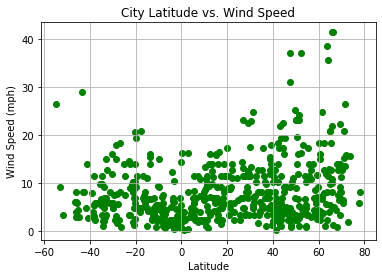

In [30]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="green", marker="o", edgecolor="green")
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Wind_Speed.png")
plt.show()